SEÑALES ELÉCTRICAS

Práctica de Ejercicios n°8, Tema 2 y 3 Miercoles 15 de Mayo de 2024

**OBJETIVO**: Afianzar el uso de las propiedades de la TdF con respecto a la
convolución y a la autocorrelación. Usar la DFT para calcular espectros aproximados de señales de energía y de señales potencia.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fftshift

from typing import Union
from scipy.signal import square, fftconvolve
from scipy.ndimage import shift

# Enunciado

Se tiene una señal de energía, de 1 segundo de duración, consistente en 6 ciclos
cosenoidales centrados en el origen.

In [2]:
# Generamos la señal seno

frecuencia_senial = 1000  # Hz
cantidad_ciclos = 6

frecuencia_muestreo = frecuencia_senial * 100
duracion_senial = 1/frecuencia_senial * cantidad_ciclos

vector_tiempo = np.arange(
    start=0,
    stop=duracion_senial,
    step=1/frecuencia_muestreo
)

senial = np.cos(2*np.pi*frecuencia_senial*vector_tiempo)

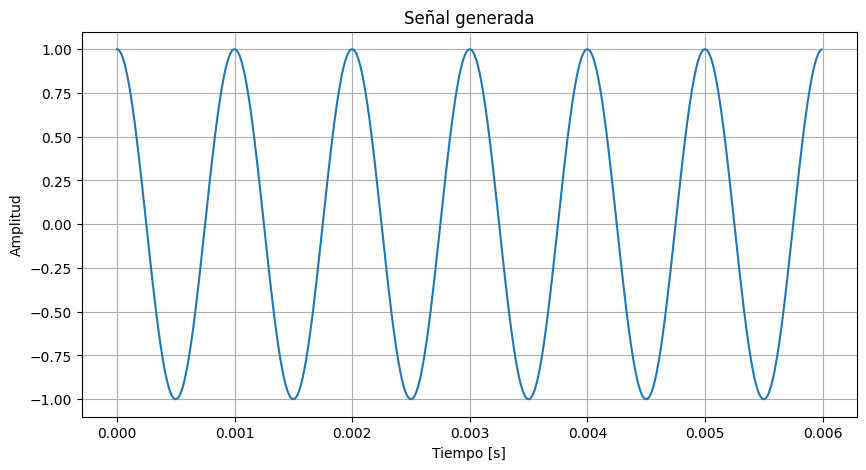

In [3]:
fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.title("Señal generada")

plt.plot(vector_tiempo, senial)

plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

plt.grid()
plt.show()

In [4]:
# La centramos en el origen

In [5]:
cantidad_segundos_lados = duracion_senial / 2

cantidad_muestras_lados = int(frecuencia_muestreo * cantidad_segundos_lados)

senial_centrada = np.pad(
    senial,
    (cantidad_muestras_lados, cantidad_muestras_lados-1)
)

vector_tiempo_centrado = np.arange(
    start=-cantidad_segundos_lados-vector_tiempo.max()/2,
    stop=cantidad_segundos_lados+vector_tiempo.max()/2,
    step=1/frecuencia_muestreo
)

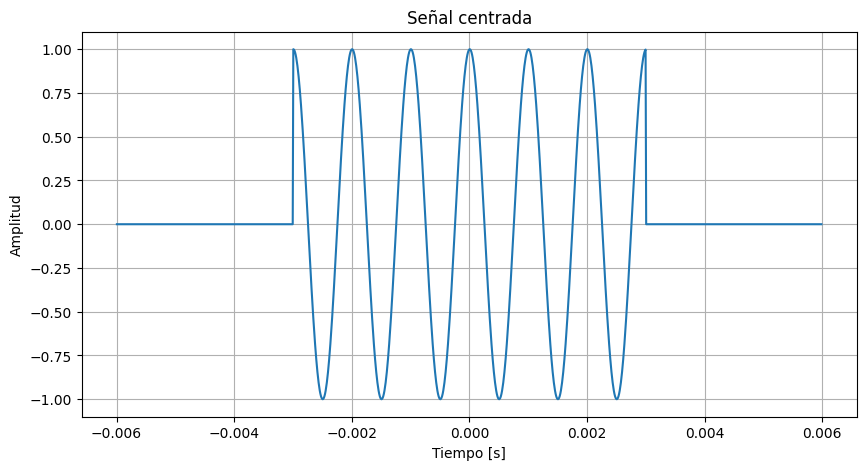

In [6]:
fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.title("Señal centrada")

plt.plot(vector_tiempo_centrado, senial_centrada)

plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

plt.grid()
plt.show()

## Apartado A

Considere a la señal dada como formada por el producto (en el tiempo) de la señal cosenoidal de duración infinita multiplicada por un pulso rectangular de amplitud unitaria.

Encuentre la TdF aplicando la propiedad de "producto en el tiempo - convolución en la frecuencia" la TdF

In [7]:
# Creo un pulso rectangular centrado

pulso_rectangular = square((2*np.pi*duracion_senial)*vector_tiempo, duty=0.5)
pulso_rectangular_centrado = np.pad(
    pulso_rectangular,
    (cantidad_muestras_lados, cantidad_muestras_lados-1)
)

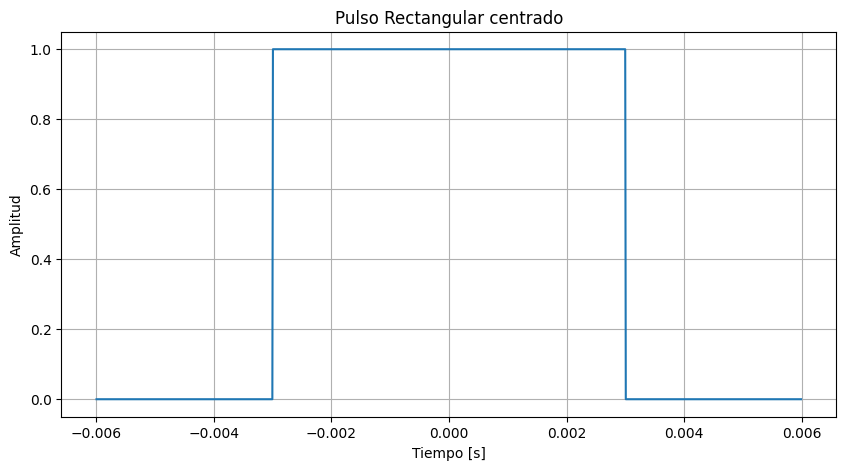

In [8]:
fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.title("Pulso Rectangular centrado")

plt.plot(vector_tiempo_centrado, pulso_rectangular_centrado)

plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

plt.grid()
plt.show()

In [9]:
# Creo señal coseno infinita
senial_infinita = np.cos(2*np.pi*frecuencia_senial*vector_tiempo_centrado)

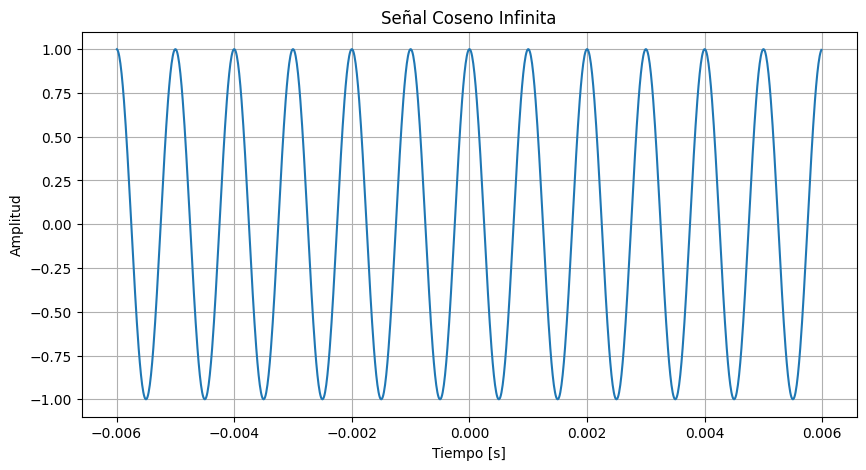

In [10]:
fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.title("Señal Coseno Infinita")

plt.plot(vector_tiempo_centrado, senial_infinita)

plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

plt.grid()
plt.show()

### Producto en el tiempo

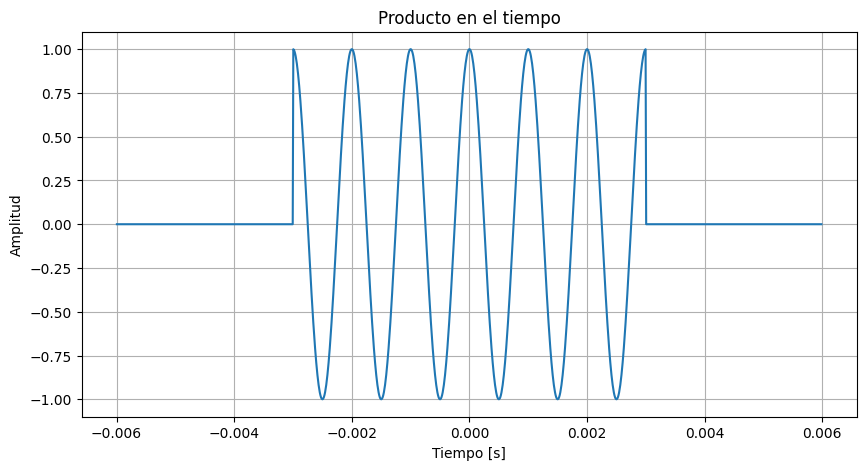

In [11]:
producto_temporal = pulso_rectangular_centrado * senial_infinita

fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.title("Producto en el tiempo")

plt.plot(vector_tiempo_centrado, producto_temporal)

plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

plt.grid()
plt.show()

### Convolución en la frecuencia

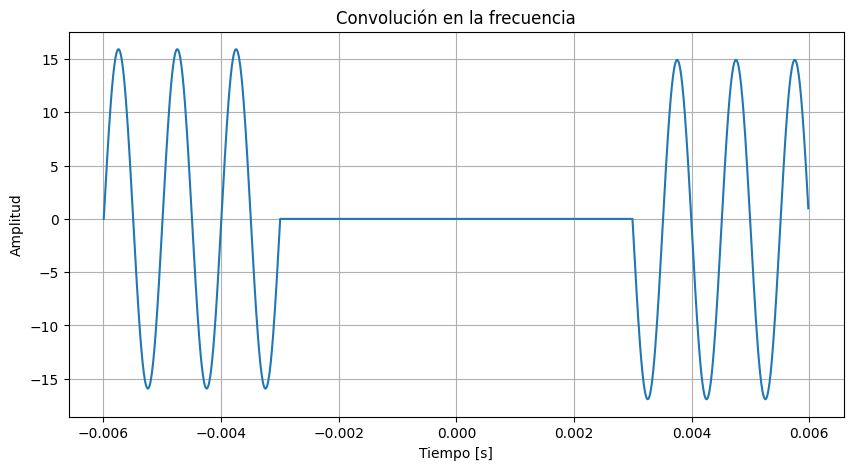

In [12]:
convolucion_frecuencia = fftconvolve(senial_infinita, pulso_rectangular_centrado, mode='same')

fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.title("Convolución en la frecuencia")

plt.plot(vector_tiempo_centrado, convolucion_frecuencia)

plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

plt.grid()
plt.show()